# Unsupervised Analysis of Days of the Week Using Gaussian Mixture Model

Treating crossing each data as features to learn about relationships between various days

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from  sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [97]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

## Explore Data - Visualization

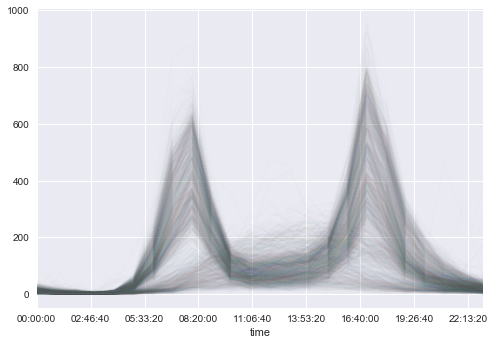

In [98]:
#pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha =0.01);

# Principal Componenent Analysis

In [71]:
pivoted.shape

(24, 1610)

In [72]:
X = pivoted.fillna(0).T.values
X.shape

(1610, 24)

1. pivoted.shape shows 24hrs by 1610 days. Each day consists of an observation and each observation consists of a 24hour. 
2. Transposing the data, enables us to look at the days are in relationship to each other.

Next we will reduce the dimesionality of the days using PCA


In [73]:
X2 = PCA(2, iterated_power=4,svd_solver='full').fit_transform(X)
X2.shape

(1610, 2)

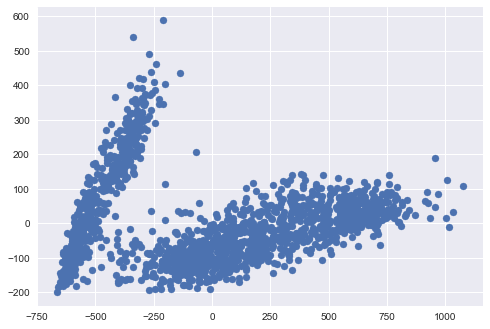

In [74]:
plt.scatter(X2[:,0],X2[:,1])

## Unsupervised Clustering-Gaussian Mixture Model

In [76]:
gmm =GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 1, 1])

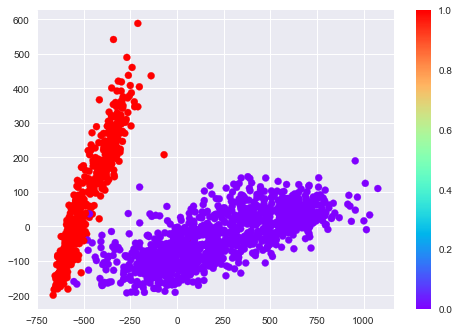

In [40]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap='rainbow') 
plt.colorbar()

 * Purple cluster shows labels=0, and red shows labels =
 * Next lets try and find out What is going on within the clusters.

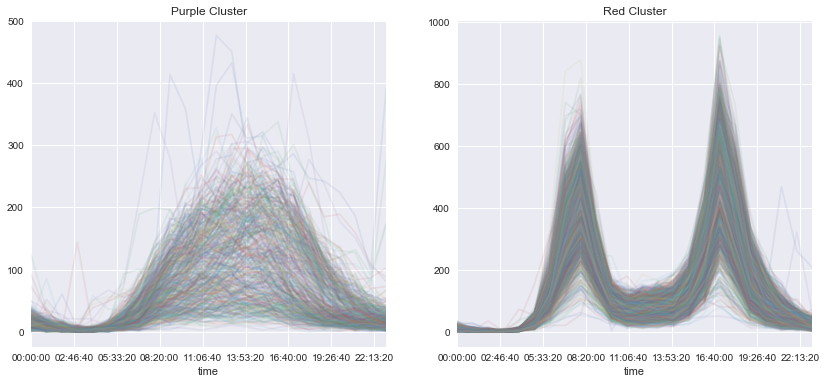

In [94]:
fig, ax = plt.subplots(1, 2, figsize =(14, 6))
                      
pivoted.T[labels == 0].T.plot(legend =False, alpha =0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend =False, alpha =0.1, ax=ax[1]);

ax[0].set_title ('Purple Cluster')
ax[1].set_title ('Red Cluster');

# Comparing with Day of Week

In [61]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

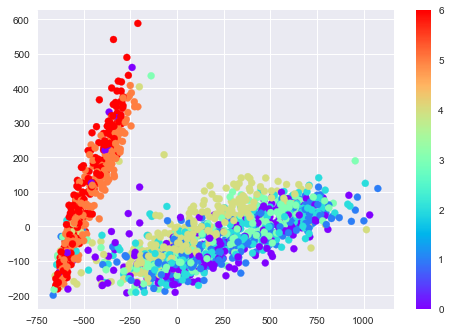

In [62]:
plt.scatter(X2[:,0],X2[:,1], c=dayofweek, cmap='rainbow') 
plt.colorbar()

## Analyzing Outliers

The following are weekdays with a holiday-like patters. i.e Days that are none weekends that are non commute days.

In [64]:
#check the dates when the label=1 ie weekend, and day of week where is less that 5(MTWTF)
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06'],
              dtype='datetime64[ns]', freq=None)

What is going on with Feb 2nd 2017? Looks like it was a [snow day]( http://www.seattletimes.com/seattle-news/snow-in-seattle-readers-share-their-photos-from-around-the-region/)

## Summary

Counting bikes going across the bridge helps us identify weekdays.